In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [2]:
df = pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv')

In [3]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


okay it seems that all the data are objects there is no numerical data ,let's check that

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
df.drop_duplicates(inplace=True)
df.shape

(8124, 23)

No missing data or duplicated row , what a bad day !

i am here to apply my ANN skills so i will skip the EDA if you want https://www.kaggle.com/code/mahmoudftolba/a-detailed-regression-eda-for-beginners#6-|--Feature-Engineering that is my notebook explaining EDA

In [7]:
y = df.pop('class')
y = y.map( {'e': 1, 'p': 0} ).astype(int)

In [8]:
cat_col = df.select_dtypes(include = 'object').columns
df = pd.get_dummies(df , cat_col ,drop_first=True)
X_train, X_test, y_train, y_test = train_test_split( df , y 
                                                    , test_size=0.2 , random_state=True)

In [9]:
X_train.shape

(6499, 95)

In [10]:
y_train.unique()

array([1, 0])

# Classifier Using the Sequential API

In [11]:
model_Seq = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[95]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1 , activation = 'sigmoid')
])

In [12]:
optimizer = keras.optimizers.SGD(learning_rate=0.001)
model_Seq.compile(loss = 'binary_crossentropy' , optimizer = optimizer,metrics=["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint('model_Seq.h5' , save_best_only=True)

<AxesSubplot:>

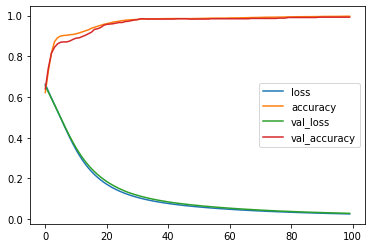

In [13]:
history = model_Seq.fit(X_train, y_train, epochs=100 ,validation_split=0.1 ,verbose= 0 ,callbacks=[checkpoint_cb])
pd.DataFrame(history.history).plot()

i am not satisfied with that loss we get so we could do hyperparamter tunning , i will gives you some hints about priority of tuning ANN

In [14]:
model_Seq.evaluate(X_test , y_test)

51/51 [==============================] - 0s 2ms/step - loss: 0.0375 - accuracy: 0.9920


[0.037460215389728546, 0.9919999837875366]

what i have use is called Sequential  model it's simple and easy to use and extremely common , but let's try more complex one called Functional model

# Classifier Using the Functional API

but why we sometimes want to use Functional API?
-  This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path) thus, save simple patterns in the data may end up being distorted by this sequence of transformations
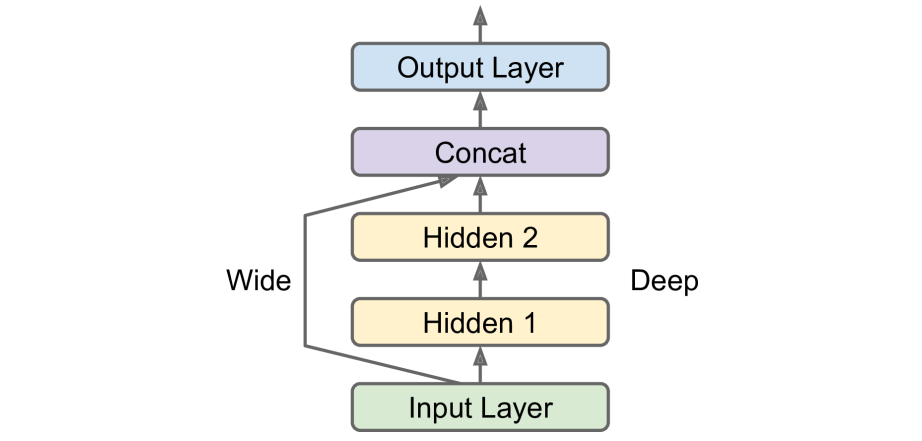

In [15]:
input_ = keras.layers.Input(shape=[95] )
hidden1 = keras.layers.Dense(300 , activation = 'relu')(input_)
hidden2 = keras.layers.Dense(100 , activation = 'relu')(hidden1)

concat = keras.layers.Concatenate()([input_ , hidden2])
output = keras.layers.Dense(1,activation = 'sigmoid')(concat) 
model_Fun = keras.Model(inputs =[input_] , outputs = [output])

In [16]:
optimizer = keras.optimizers.SGD(learning_rate=0.001)
model_Fun.compile(loss = 'binary_crossentropy' , optimizer = optimizer,metrics=["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint('model_Fun.h5' , save_best_only=True)

<AxesSubplot:>

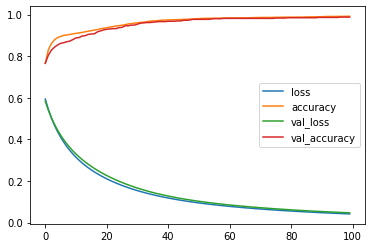

In [17]:
history = model_Fun.fit(X_train, y_train, epochs=100 ,validation_split=0.1 ,verbose= 0 ,callbacks=[checkpoint_cb])
pd.DataFrame(history.history).plot()

In [18]:
model_Fun.evaluate(X_test , y_test)

51/51 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9865


[0.051398418843746185, 0.9864615201950073]

so as you can see that for the same settings the seq dose better that Fun , so let's not give up on the Fun and tring a little bit complicated one with the same settings
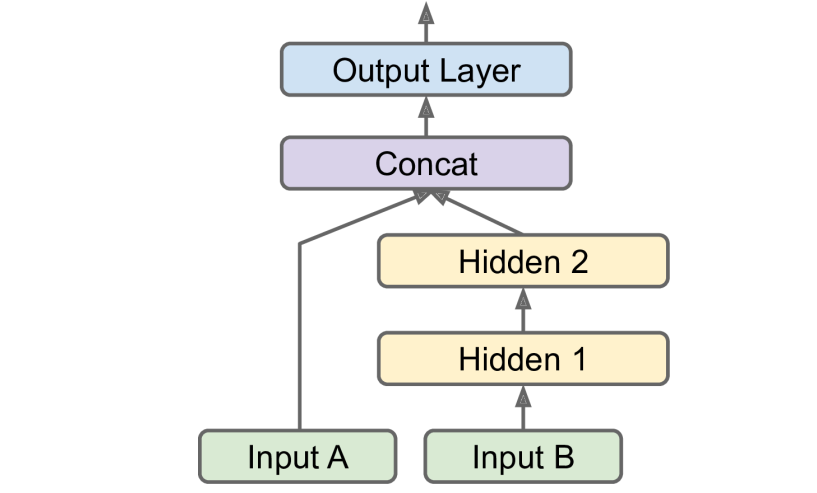

In [19]:
input_A = keras.layers.Input(shape=[46], name="wide_input")
input_B = keras.layers.Input(shape=[55], name="deep_input")

hidden1 = keras.layers.Dense(300, activation="relu")(input_B)
hidden2 = keras.layers.Dense(100, activation="relu")(hidden1)

concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1,activation = 'sigmoid' ,name="output")(concat)
model_Fun_mod = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [20]:
X_train_A  , X_train_B = X_train.iloc[:,:46] , X_train.iloc[:,40:]
X_test_A  , X_test_B = X_test.iloc[:,:46] , X_test.iloc[:,40:]

In [21]:
optimizer = keras.optimizers.SGD(learning_rate=0.001)
model_Fun_mod.compile(loss = 'binary_crossentropy' , optimizer = optimizer,metrics=["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint('model_Fun_mod.h5' , save_best_only=True)

<AxesSubplot:>

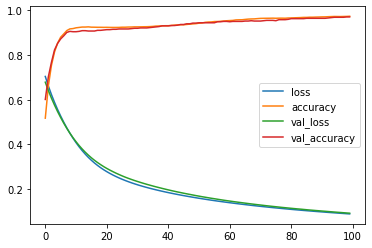

In [22]:
history = model_Fun_mod.fit((X_train_A , X_train_B), y_train, epochs=100 ,validation_split=0.1 ,verbose= 0 ,callbacks=[checkpoint_cb])
pd.DataFrame(history.history).plot()

In [23]:
model_Fun_mod.evaluate((X_test_A , X_test_B) , y_test)

51/51 [==============================] - 0s 2ms/step - loss: 0.0859 - accuracy: 0.9772


[0.0859353318810463, 0.9772307872772217]

till now the Seq model is the one , so let's fine-tuning it

# Fine-Tuning Neural Network Hyperparameters

The flexibility of neural networks is also one of their main drawbacks: there are many
hyperparameters to tweak. Not only can you use any imaginable network architec‐
ture, but even in a simple MLP you can change the number of layers, the number of
neurons per layer, the type of activation function to use in each layer, the weight initi‐
alization logic, and much more. How do you know what combination of hyperpara‐
meters is the best for your task?
-  so i will try to give a systemic way of thinking
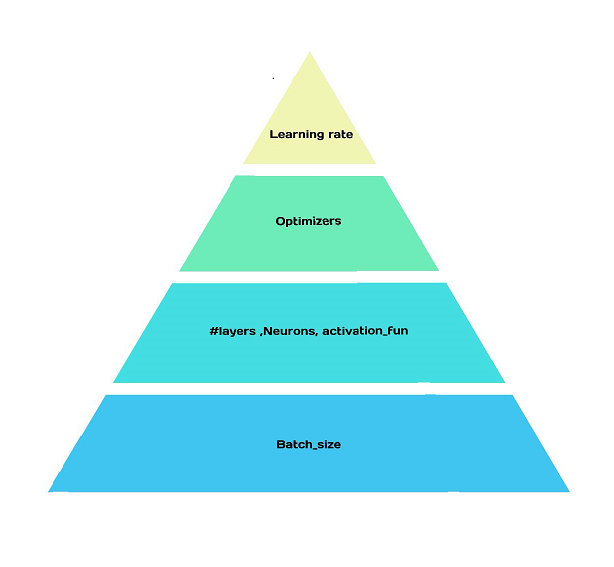

#### let's start with learning rate

In [24]:
def build_model(learning_rate=3e-3, input_shape=[95]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    model.add(keras.layers.Dense(300, activation="relu"))
    model.add(keras.layers.Dense(100, activation="relu"))
    model.add(keras.layers.Dense(1 , activation ='sigmoid'))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss = 'binary_crossentropy' , optimizer = optimizer
                  ,metrics=["accuracy"])
    return model

In [25]:
keras_cla = keras.wrappers.scikit_learn.KerasClassifier(build_model)

#### Learning rate
The learning rate is arguably the most important hyperparameter.In general ,train the model for a few hundred iter‐
ations, starting with a very low learning rate (e.g., 10-5) and gradually increasing
it up to a very large value (e.g., 10)

In [26]:
learning_rate_distribs={
    'learning_rate' :reciprocal(3e-4 , 3e-2)
}
rnd_search_cv = RandomizedSearchCV(keras_cla , learning_rate_distribs , n_iter= 10 , cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,validation_split=0.1,callbacks=[keras.callbacks.EarlyStopping(patience=10)] , verbose = 0)

68/68 [==============================] - 0s 2ms/step - loss: 0.1645 - accuracy: 0.9580


RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f4786647d50>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f47734ed7d0>})

In [27]:
rnd_search_cv.best_params_

{'learning_rate': 0.013069418045404447}

In [28]:
rnd_search_cv.best_score_

0.9996922214825948

In [29]:
model = rnd_search_cv.best_estimator_.model

In [30]:
model.evaluate(X_test , y_test)

51/51 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 0.9994


[0.0015593619318678975, 0.9993846416473389]

so as i got 100% accuracy i am satisfied , but i will give you some tips in case your projects require more tunning
-  Choosing a better optimizer than plain old Mini-batch Gradient Descent
-  for many problems you can start with just one or two hidden layers and the neural network will work just fine
-  for number of Neurons it used to be common to size them to form a pyramid, with fewer and fewer neurons at each layer, 
-  But in practice, it’s often simpler and more efficient to pick a model with more layers and neurons than you actually need, then use early stopping and other regularization techniques to prevent it from overfitting.
-  the ReLU activation function will be a good default for all hidden layers
-  one strategy is to try to use a large batch size, using learning rate warmup, and if training is unstable or the final performance is disappointing, then try using a small batch size instead.